In [170]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from sklearn.preprocessing import LabelEncoder

In [106]:
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']

In [193]:
abo_path = 'D:/Users/masoodw/ML_FINANCE/asigmo/github/asigmo/data/Iris/iris.data'
p_df_raw = pd.read_csv(abo_path, sep=',', encoding="UTF-8", names=column_names)

In [194]:
p_df_raw.columns = column_names

In [195]:
p_df_raw.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [196]:
p_df_raw.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
class           0
dtype: int64

In [197]:
p_df_raw["class"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [198]:
df_X = p_df_raw.drop("class", axis=1)
df_y = LabelEncoder().fit_transform(list(p_df_raw["class"]))     

In [201]:
df_y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [212]:
internal_measures = []
for k in range(2, 35):
    AgglClustering = AgglomerativeClustering(n_clusters=k, linkage='single')
    AgglClustering.fit(df_X)
    v_measure = metrics.homogeneity_completeness_v_measure(df_y, AgglClustering.labels_)[2]
    silhouette = metrics.silhouette_score(df_X, AgglClustering.labels_, metric='euclidean', sample_size=None)
    internal_measures.append([k,v_measure,silhouette])    

In [227]:
internal_measures

[[2, 0.7336804366512104, 0.6863930543445408],
 [3, 0.7174643320814477, 0.5118387098922372],
 [4, 0.7081588975542795, 0.2817777404407329],
 [5, 0.6864640379458857, 0.28348367281231845],
 [6, 0.6783435563944394, 0.2211144115880155],
 [7, 0.6673602733903741, 0.13143138174943855],
 [8, 0.6599508222832074, 0.05737112103104182],
 [9, 0.6528963614660404, 0.021098547926016994],
 [10, 0.6461804453281114, 0.023816079349460964],
 [11, 0.6341447301598725, 0.06359219380979528],
 [12, 0.6239672809318811, 0.020144519977924016],
 [13, 0.6179763328268824, 0.008144626429861053],
 [14, 0.6126692246256674, -0.01110378529225675],
 [15, 0.6043058800776892, -0.10267338347855227],
 [16, 0.5970738581337126, -0.08324608114246303],
 [17, 0.5926354701819495, -0.08437182595610243],
 [18, 0.5884231880402395, -0.0869589762096992],
 [19, 0.5833418491144473, -0.09733831599585652],
 [20, 0.7070326496496874, 0.006548220423581063],
 [21, 0.7047940787498607, -0.0006257315291491613],
 [22, 0.6970558189410773, -0.0296192934

In [214]:
max(internal_measures[:1])

[2, 0.7336804366512104, 0.6863930543445408]

In [215]:
max_v_measure =np.argmax(internal_measures[:1])

In [216]:
optimum_clusters = internal_measures[max_v_measure][0]
optimum_clusters

2

In [217]:
estimator = AgglomerativeClustering(n_clusters=4, linkage='single')
estimator.fit(df_X)

AgglomerativeClustering(linkage='single', n_clusters=4)

### Internal Measures

In [218]:
from sklearn import metrics

In [219]:
# Perfect labelings are both homogeneous and complete, hence have score 1.0:
# Labelings that assign all classes members to the same clusters are complete be not homogeneous
# Labelings that have pure clusters with members coming from the same classes are homogeneous but un-necessary splits harms completeness
# If classes members are completely split across different clusters, the assignment is totally incomplete
sill = metrics.silhouette_score(df_X, estimator.labels_, metric='euclidean', sample_size=None)  ### best score is 1
db = metrics.davies_bouldin_score(df_X, estimator.labels_) ### best score is 0
sill, db

(0.2817777404407329, 0.5632800426859428)

### External Measures

In [220]:
# A clustering result satisfies homogeneity if all of its clusters contain only data points which are members of a single class.
# A clustering result satisfies completeness if all the data points that are members of a given class are elements of the same cluster.
# Both scores have positive values between 0.0 and 1.0, larger values being desirable.
# The V-measure is the harmonic mean between homogeneity and completeness:

In [221]:
print('V_score')
print(metrics.homogeneity_completeness_v_measure(df_y, estimator.labels_))
print('Accuracy')
print(metrics.accuracy_score(df_y, estimator.labels_))
print('Confusion Matrix')
print(metrics.confusion_matrix(df_y, estimator.labels_))
print('Confusion Report')
print(metrics.classification_report(df_y, estimator.labels_))
print('f1 score')
print(metrics.f1_score(df_y, estimator.labels_, average='weighted'))

V_score
(0.5922803215408909, 0.880409409669718, 0.7081588975542795)
Accuracy
0.013333333333333334
Confusion Matrix
[[ 0 50  0  0]
 [50  0  0  0]
 [47  0  2  1]
 [ 0  0  0  0]]
Confusion Report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        50
           1       0.00      0.00      0.00        50
           2       1.00      0.04      0.08        50
           3       0.00      0.00      0.00         0

    accuracy                           0.01       150
   macro avg       0.25      0.01      0.02       150
weighted avg       0.33      0.01      0.03       150

f1 score
0.02564102564102564


c:\programdata\anaconda3\envs\asigmo\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Dendogram Example
#### https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html#sphx-glr-auto-examples-cluster-plot-agglomerative-dendrogram-py

In [232]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_,  model.distances_,
                                      counts]).astype(float)

    
    fig = plt.figure(figsize=(15, 10))
    plt.grid(True)
    dendrogram(linkage_matrix, **kwargs)

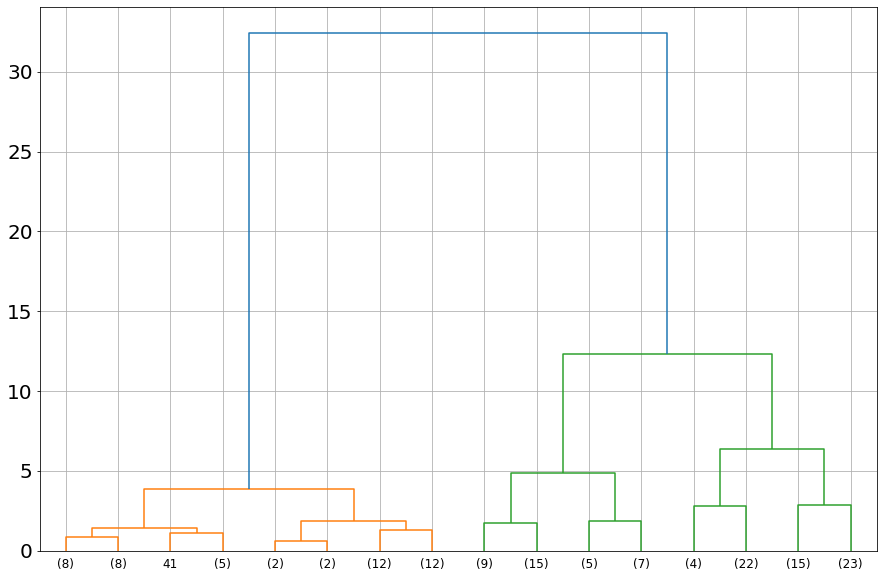

In [233]:
estimator = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
estimator.fit(df_X)
plot_dendrogram(estimator, truncate_mode='level', p=3)

In [224]:
estimator = AgglomerativeClustering(n_clusters=30, linkage='single')
estimator.fit(df_X)

AgglomerativeClustering(linkage='single', n_clusters=30)

In [225]:
print('V_score')
print(metrics.homogeneity_completeness_v_measure(df_y, estimator.labels_))
print('Accuracy')
print(metrics.accuracy_score(df_y, estimator.labels_))
print('Confusion Matrix')
print(metrics.confusion_matrix(df_y, estimator.labels_))
print('Confusion Report')
print(metrics.classification_report(df_y, estimator.labels_))
print('f1 score')
print(metrics.f1_score(df_y, estimator.labels_, average='weighted'))

V_score
(0.9558587512455008, 0.46890874944318245, 0.6291700666588764)
Accuracy
0.43333333333333335
Confusion Matrix
[[47  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  1
   0  0  0  1  0  0]
 [ 0  0  0  0  0  3  3  0  0  0  0  0  2  0 37  0  0  0  1  0  0  0  1  0
   0  1  1  0  1  0]
 [ 0  2 18  2  3  0 11  1  1  1  2  1  0  1  0  1  1  1  0  1  0  1  0  0
   1  0  0  0  0  1]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 

c:\programdata\anaconda3\envs\asigmo\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Related Links
### https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html